In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')

# Separate features and target variable
X = df.drop('charges', axis=1)
y = df['charges']

In [3]:
# Define categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']


In [4]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(drop='first')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Define the model pipelines
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', RandomForestRegressor(random_state=42))
])

pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Define parameter grids for both models
param_grid_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

param_grid_gb = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 5],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}


In [6]:
# Perform GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Perform GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

# Get the best models and their parameters
best_rf = grid_search_rf.best_estimator_
best_gb = grid_search_gb.best_estimator_

print("Best Random Forest Parameters:", grid_search_rf.best_params_)
print("Best Gradient Boosting Parameters:", grid_search_gb.best_params_)

Best Random Forest Parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best Gradient Boosting Parameters: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 100}


In [7]:
# Evaluate Random Forest
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R^2 Score: {r2_rf}')

Random Forest - Mean Squared Error: 20358728.648258142
Random Forest - R^2 Score: 0.8688638003503627


In [8]:
# Evaluate Gradient Boosting
y_pred_gb = best_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f'Gradient Boosting - Mean Squared Error: {mse_gb}')
print(f'Gradient Boosting - R^2 Score: {r2_gb}')

Gradient Boosting - Mean Squared Error: 19125160.29767147
Gradient Boosting - R^2 Score: 0.8768095551319536


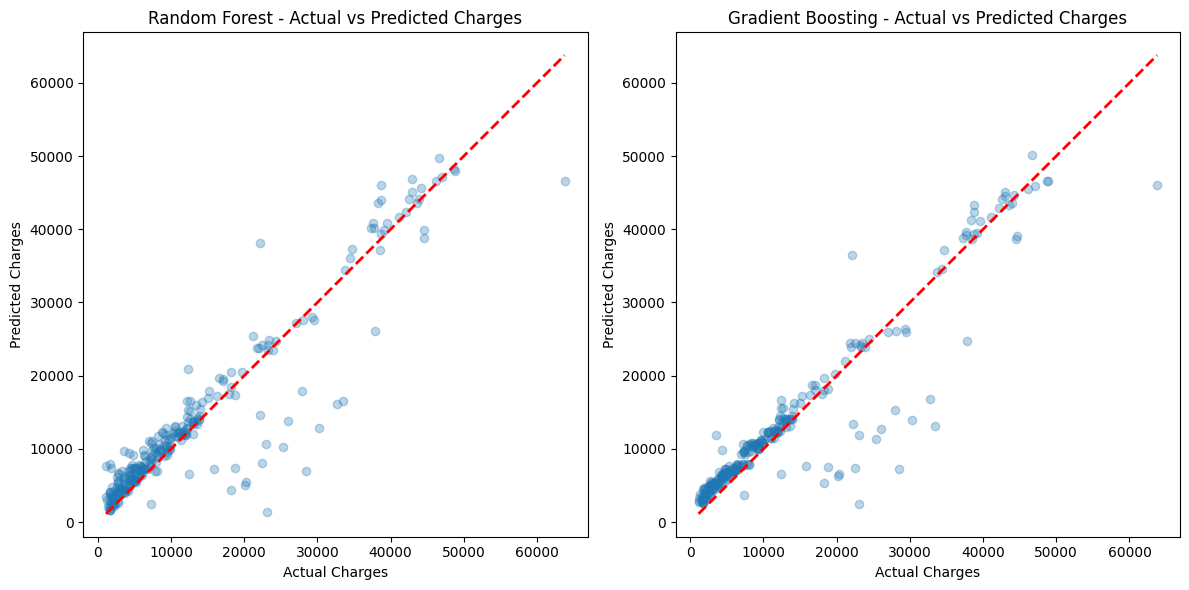

In [9]:
# Visualize the results
plt.figure(figsize=(12, 6))

# Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Random Forest - Actual vs Predicted Charges')

# Gradient Boosting
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_gb, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Gradient Boosting - Actual vs Predicted Charges')

plt.tight_layout()
plt.show()

In [10]:
# Save the predictions to a new file
# First, make predictions on the entire dataset
y_pred_rf_all = best_rf.predict(X)
y_pred_gb_all = best_gb.predict(X)

# Add predictions to the original dataframe
df['predicted_charges_rf'] = y_pred_rf_all
df['predicted_charges_gb'] = y_pred_gb_all

# Save the dataframe with predictions to a new CSV file
df.to_csv('insurance_with_predictions.csv', index=False)
print("Predictions saved to 'insurance_with_predictions.csv'")

Predictions saved to 'insurance_with_predictions.csv'
